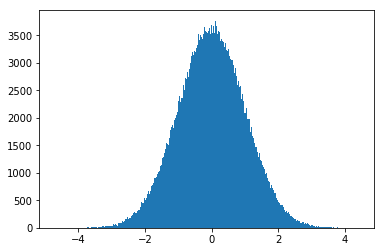

In [11]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time

mu,sig,N = 0,1,1000000
pts = []

def q(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))

def metropolis(N):
    r = np.zeros(1)
    p = q(r[0])
    pts = []
    
    for i in range(N):
        rn = r + np.random.uniform(-1,1)
        pn = q(rn[0])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r)
    
    pts = np.array(pts)
    return pts
    
b=metropolis(N)
plt.hist(b, bins=1000) 
plt.show()

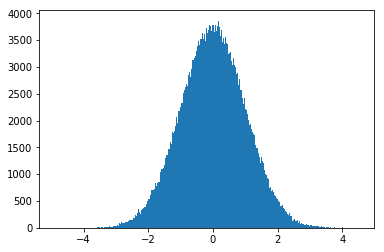

In [12]:
#coding:utf-8

#使用Metropolis-Hastings， 采样正太分布
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time

mu,sig,N = 0,1,1000000
pts = []

def q(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))

def metropolis(N):
    #初始值x0
    r = np.zeros(1)
    p = q(r[0])
    pts = []
    
    for i in range(N):
        #建议分布是均匀分布，使用这个分布的好处是aij=min{1, (q_ji*p_j/q_ij*p_i)}，其中q_ij和q_ji在建议分布中是相等的，因此aij仅仅是aij=min{1, p_j/p_i}
        #下一节点j
        rn = r + np.random.uniform(-1,1)
        #pj
        pn = q(rn[0])
        #如果p_j/p_i是1，接受转移
        if pn >= p:
            p = pn
            r = rn
        else:
            #否则，以一定概率接受
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r)
    
    pts = np.array(pts)
    return pts
    
b=metropolis(N)
plt.hist(b, bins=1000) 
plt.show()

In [14]:
print "hi"

hi


In [40]:
vec = [0.1, 0.2, 0.4, 0.3]
def sample_discrete(vec):
    u = np.random.rand()
    start = 0
    for i,p in enumerate(vec):
        if u > start:
            start += p
        else:
            return i-1
    return i
index2word = ["中", "国", "你", "好"]
result = dict([(w, 0) for w in index2word])
for i in range(100000):
    index = sample_discrete(vec)
    result[index2word[index]] += 1
for i,k in result.items():
    print i,k


你 39902
好 30204
中 9992
国 19902


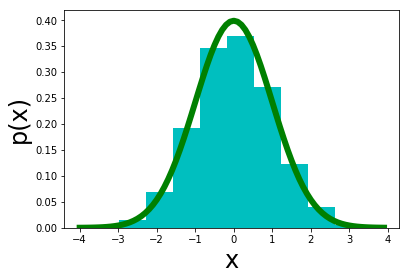

In [48]:
from pylab import *
import numpy as np

#box-muller的极坐标形式，推导可以参考https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
def boxmuller_polar(n):
    
    x = np.zeros((n,2))
    y = np.zeros((n,2))
    
    for i in range(n):
        x[i,:] = np.array([2,2])
        x2 = x[i,0]*x[i,0]+x[i,1]*x[i,1]
        while (x2)>1:
            x[i,:] = np.random.rand(2)*2-1
            x2 = x[i,0]*x[i,0]+x[i,1]*x[i,1]

        y[i,:] = x[i,:] * np.sqrt((-2*log(x2))/x2)
    
    y = np.reshape(y,2*n,1)
    return y
#box-muller基本形式
def boxmuller_basic(n):
    y = []
    for i in range(n):
        U1 = np.random.rand()
        U2 = np.random.rand()
        theta = np.pi * 2*U1
        r = np.sqrt(-2*log(U2))
        y.append(r*sin(theta))
        y.append(r*cos(theta))
#y = boxmuller(1000)
y = boxmuller(1000)
hist(y,normed=1,fc='c')
x = arange(-4,4,0.1)
plot(x,1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2),'g',lw=6)
xlabel('x',fontsize=24)
ylabel('p(x)',fontsize=24)
show()